# GCC128 – INTELIGÊNCIA ARTIFICIAL

## REDES NEURAIS ARTIFICIAIS

Professor: Eric Araújo

Grupo: 
- Henrique Silva Rabelo - 202010698
- Chrystian Arriel Amaral - 201920890

## Imports

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Contants

In [69]:
NEURON_1_INDEX = 0
NEURON_2_INDEX = 1
NEURON_3_INDEX = 2
NEURON_4_INDEX = 3

## Functions

In [70]:
def random_weights():
  return  np.random.rand(4)

In [71]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [72]:
def sigmoid_derivate(x):
  return x * (1-x)

In [73]:
def relu(x):
  if(x >= 0):
    return x
  else:
    return 0

In [74]:
def relu_derivate(x):
  return 1. * (x >= 0)

In [75]:
def calculate_error(y, sample_y):
  return y - sample_y

In [76]:
def update_bias(deltas, bias, learning_rate):
    bias_neuron_1, bias_neuron_2, bias_neuron_3, bias_neuron_4 = bias

    bias_neuron_1 = bias_neuron_1 - deltas[NEURON_1_INDEX] * learning_rate
    bias_neuron_2 = bias_neuron_2 - deltas[NEURON_2_INDEX] * learning_rate
    bias_neuron_3 = bias_neuron_3 - deltas[NEURON_3_INDEX] * learning_rate
    bias_neuron_4 = bias_neuron_4 - deltas[NEURON_4_INDEX] * learning_rate

    return bias_neuron_1, bias_neuron_2, bias_neuron_3, bias_neuron_4

In [77]:
def simulate(x, weights, bias):
  w1, w2, w3, w4 = weights[:,NEURON_1_INDEX], weights[:,NEURON_2_INDEX], weights[:,NEURON_3_INDEX], weights[:,NEURON_4_INDEX]
  bias_neuron_1, bias_neuron_2, bias_neuron_3, bias_neuron_4 = bias

  sop4 = np.sum(w4 * x) + bias_neuron_4
  neuron_4 = sigmoid(sop4)

  sop3 = np.sum(w3 * x) + bias_neuron_3
  neuron_3 = sigmoid(sop3)
  
  neuron_2_entries = np.array([0, neuron_3, neuron_4,0])
  sop2 = np.sum(w2 * neuron_2_entries) + bias_neuron_2
  neuron_2 = relu(sop2)

  neuron_1_entries = np.array([neuron_2 , neuron_3, neuron_4,0])
  sop1= np.sum(w1 * neuron_1_entries) + bias_neuron_1
  neuron_1 = sigmoid(sop1)  

  return [neuron_1, neuron_2, neuron_3, neuron_4]

In [78]:
def calculate_deltas(y, sample_y, train_weights):
  weigths_1 = train_weights[:,NEURON_1_INDEX]
  
  delta_neuron_1 =  calculate_error(y[NEURON_1_INDEX],sample_y) * sigmoid_derivate(y[NEURON_1_INDEX])
  delta_neuron_2 = delta_neuron_1 * weigths_1[0] * relu_derivate(y[NEURON_2_INDEX])
  delta_neuron_3 = delta_neuron_1 * weigths_1[1] * sigmoid_derivate(y[NEURON_3_INDEX])
  delta_neuron_4 = delta_neuron_1 * weigths_1[2] * sigmoid_derivate(y[NEURON_4_INDEX])

  return [delta_neuron_1, delta_neuron_2, delta_neuron_3, delta_neuron_4]

In [79]:
def update_weights(training_weights, bias, Y, i, X):
  new_weights = training_weights
  w1 = training_weights[:,0]
  w5 = training_weights[3,:]
  w2 = training_weights[:,1]

  deltas = calculate_deltas(Y, sample_y[i], training_weights)
  new_bias = update_bias(deltas, bias, learning_rate)

  w_n2_1 = deltas[1] * Y[1] * learning_rate
  w_n3_1 = deltas[2] * Y[2] * learning_rate
  w_n4_1 = deltas[3] * Y[3] * learning_rate
  
  w1 = [w1[0] - w_n2_1, w1[1] - w_n3_1 ,w1[2] - w_n4_1, 0]

  new_weights[:,0] = w1

  w_n3_2 = deltas[1] * Y[2] * learning_rate
  w_n4_2 = deltas[1] * Y[3] * learning_rate
  
  new_weights[:,1] = [0, w2[1] - w_n3_2, w2[2] - w_n4_2, 0]
  
  w_n5_3 = deltas[2] * X * learning_rate
  w_n5_4 = deltas[3] * X * learning_rate
  
  new_weights[3,:] = [0, 0, w5[2] - w_n5_3, w5[3] - w_n5_4 ]

  return new_weights, new_bias

In [80]:
def train(x, sample_y, init_weights, bias, epochs):
  training_weights = init_weights
  training_bias = bias
  
  for epoch in range(epochs):
    y = []
    for i in range(len(x)):
      neurons_result = simulate(x[i], training_weights, training_bias)
      training_weights, training_bias = update_weights(training_weights, training_bias, neurons_result, i, x[i])
      y.append(neurons_result[NEURON_1_INDEX])
    if (epoch%5000 == 0):
      print('\nMean error: ', np.sum(calculate_error(y,sample_y))/len(sample_y))
  
  return training_weights, training_bias

In [81]:
def test(sample_x, sample_y, final_weights, final_bias):
  y = []
  print("Trained weights:\n", final_weights, "\n" )
  print("Trained bias:\n", final_bias, "\n" )
  print('{0:<10} | {1:^18} | {2:>10}'.format('X', 'calculated_y', 'sample_y' ))
  
  for i in range(len(sample_x)):
    neurons_result = simulate(sample_x[i], final_weights, final_bias)
    print('{0:<10} | {1:^18} | {2:>10}'.format(sample_x[i], neurons_result[NEURON_1_INDEX], sample_y[i]))
    y.append(neurons_result[NEURON_1_INDEX])

  print('\nMean error: ', np.sum(calculate_error(y,sample_y))/len(sample_y))
  
  return y

## Samples



In [82]:
# Sample 1
sample_x = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3])
sample_y = np.array([0.73212, 0.7379, 0.7838, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002])

# Sample 2
sample_x_2 = np.array([0.0, 1.0])
sample_y_2 = np.array([0.5, 0.1])

# Sample weights
init_weights = np.array([
    [3.,0,0,0],
    [-4.,1,0,0],
    [-1.,-3.,0,0],
    [0,0,2.,-10.0]
])

init_weights_2 = np.array([
    [-1. , 0 , 0, 0],
    [3., -2., 0, 0],
    [4., 2.0, 0, 0],
    [0, 0, 2., 5.]
])

#Start

Trained weights:
 [[  3.   0.   0.   0.]
 [ -4.   1.   0.   0.]
 [ -1.  -3.   0.   0.]
 [  0.   0.   2. -10.]] 

Trained bias:
 [0.04216778 0.36112846 0.90927495 0.72590783] 

X          |    calculated_y    |   sample_y
0.0        | 0.029795602846681323 |        0.5
1.0        | 0.5439641634036931 |        0.1

Mean error:  -0.013120116874812765


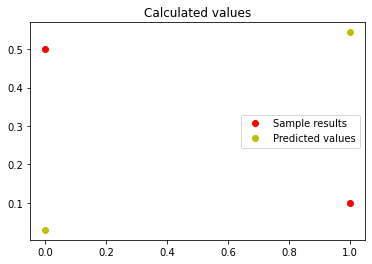

In [83]:
learning_rate = 0.03
bias = random_weights()

y = test(sample_x_2, sample_y_2, init_weights, bias)

plt.plot(sample_x_2, sample_y_2, 'or', label="Sample results")
plt.plot(sample_x_2, y, 'oy', label="Predicted values")

plt.title("Calculated values")
plt.legend()


Mean error:  -0.3581886471348547

Mean error:  -0.003109029898237159

Mean error:  -0.002479890286772213

Mean error:  -0.001965122170008593

Mean error:  -0.0015641847115179352

Mean error:  -0.0012918480966476076

Mean error:  -0.0006764545311785275

Mean error:  0.00014740170107557793
Trained weights:
 [[ 1.95831351  0.          0.          0.        ]
 [-3.33687721 -0.78889625  0.          0.        ]
 [-3.89978897  0.03145224  0.          0.        ]
 [ 0.          0.          4.74364664 -8.82712302]] 

Trained bias:
 (1.2891488056246125, 1.8653418247375746, -1.5349765177360866, -3.47434137885134) 

X          |    calculated_y    |   sample_y
-3.0       | 0.7509857554872285 |    0.73212
-2.0       | 0.7509714722165194 |     0.7379
-1.0       | 0.7526552827554053 |     0.7838
-0.5       | 0.8895762350976447 |     0.8903
0.0        | 0.9813183071819104 |      0.982
0.5        | 0.8226085053067896 |     0.8114
1.0        | 0.5621479998248249 |     0.5937
1.5        | 0.519646858654

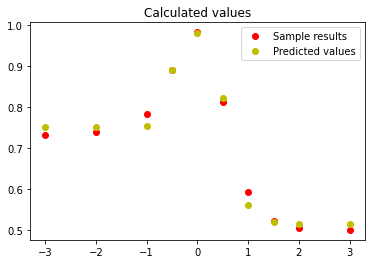

In [84]:
learning_rate = 0.045
bias = random_weights()

trained_weights, trained_bias = train(sample_x,sample_y, init_weights, bias, 40000)
y = test(sample_x, sample_y, trained_weights, trained_bias)

plt.plot(sample_x, sample_y, 'or', label="Sample results")
plt.plot(sample_x, y, 'oy', label="Predicted values")

plt.title("Calculated values")
plt.legend()